In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
Station1 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\bramprakash.csv'
df1 = pd.read_csv(Station1)
print(df1)

         date  AQI
0    1-6-2023  107
1    2-6-2023   99
2    3-6-2023  119
3    4-6-2023  146
4    5-6-2023  158
5    6-6-2023  315
6    7-6-2023  144
7    8-6-2023  115
8    9-6-2023   83
9   10-6-2023   83
10  11-6-2023  115
11  12-6-2023  130
12  13-6-2023  110
13  14-6-2023   92
14  15-6-2023   76
15  16-6-2023   93
16  17-6-2023   81
17  18-6-2023   73
18  19-6-2023   79
19  20-6-2023  114
20  21-6-2023   81
21  22-6-2023   98
22  23-6-2023  119
23  24-6-2023  120
24  25-6-2023   69
25  26-6-2023   98
26  27-6-2023  110
27  28-6-2023   71
28  29-6-2023   77
29  30-6-2023   63


In [5]:
Station2 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\mundka.csv'
df2 = pd.read_csv(Station2)

In [6]:
Station3 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\narela.csv'
df3 = pd.read_csv(Station3)

In [7]:
Station4 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\pooth-khurd.csv'
df4 = pd.read_csv(Station4)

In [8]:
#Data Normality

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

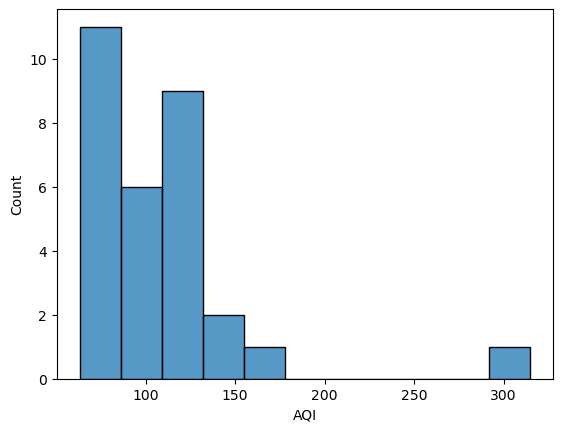

The dataset does not follow a normal distribution.


In [9]:
Weather1 = df1['AQI']
sns.histplot(Weather1)
plt.show()

statistic, p_value = shapiro(df1['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

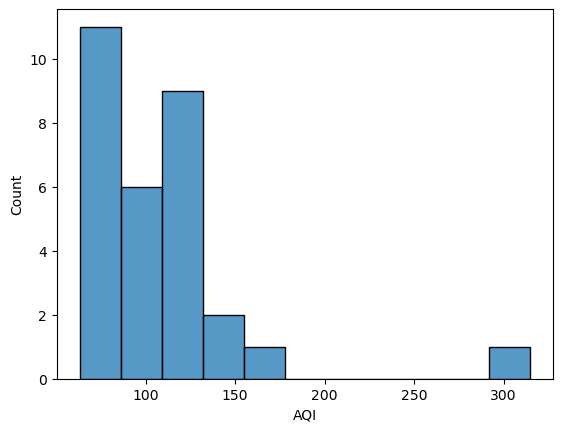

The dataset does not follow a normal distribution.


In [10]:
Weather2 = df2['AQI']
sns.histplot(Weather1)
plt.show()

statistic, p_value = shapiro(df2['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

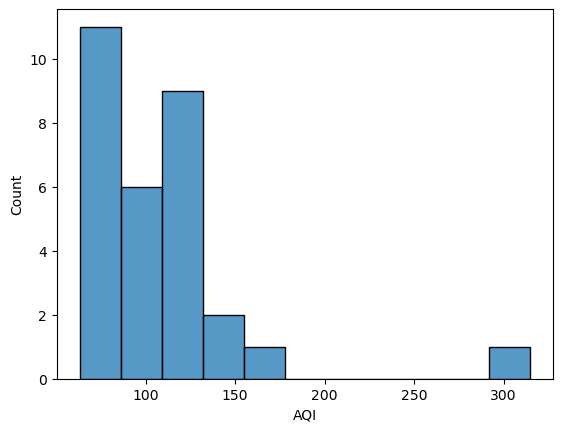

The dataset does not follow a normal distribution.


In [11]:
Weather3 = df3['AQI']
sns.histplot(Weather1)
plt.show()

statistic, p_value = shapiro(df3['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

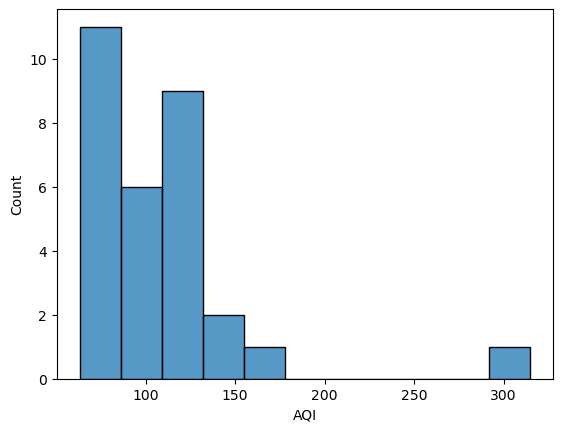

The dataset does not follow a normal distribution.


In [12]:
Weather4 = df4['AQI']
sns.histplot(Weather1)
plt.show()

statistic, p_value = shapiro(df4['AQI'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

# Kruskal-Wallis Test

All the dataset does not follow normal distribution, therefore a non-parametric statistical method is chosen. We use Kruskal-Wallis test to see whether there's a significant difference between dataset.

H0 : the distributions of all groups are equal (there's no difference among groups)
H1 : at least one group has a different distribution (there's a difference among groups)

In [13]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

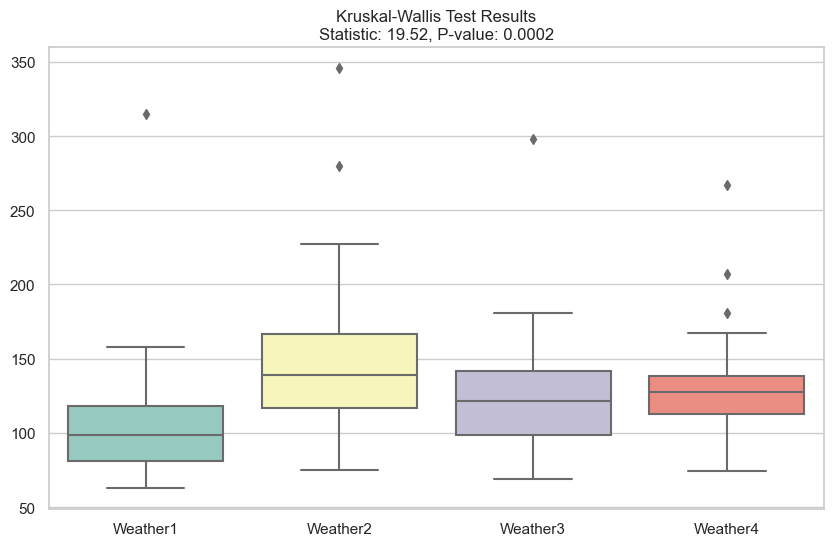

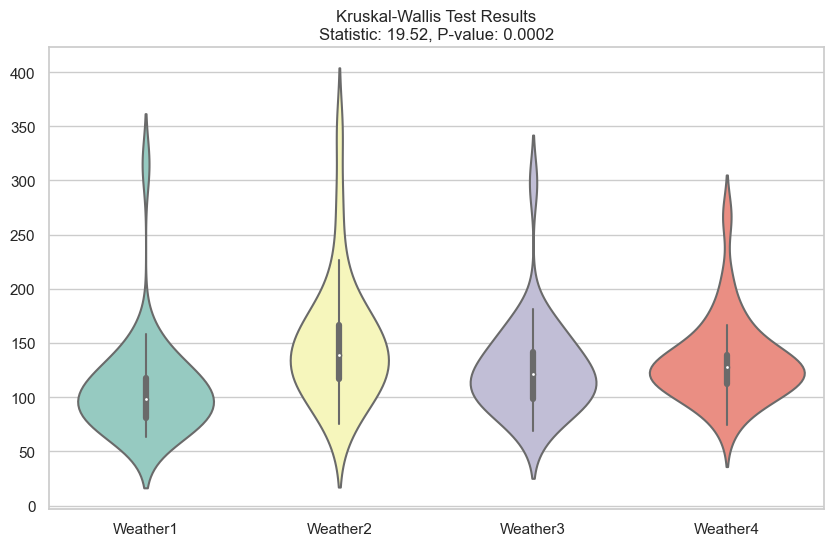

Kruskal-Wallis Statistic: 19.516719751675566
P-value: 0.0002137429482614337
There is a significant difference between at least two groups.


In [14]:
statistic, p_value = kruskal(Weather1, Weather2, Weather3, Weather4)

data = pd.DataFrame({
    'Weather1': Weather1,
    'Weather2': Weather2,
    'Weather3': Weather3,
    'Weather4': Weather4
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between the groups.")

# Correlation Analysis

Spearman rank correlation analysis is chosen as a non-parametric method to see whether there's a correlation between NDVI and air quality, how strong the correlation is, and in which direction the correlation goes

H0 : There's no correlation between NDVI and air quality
H1 : There's a correlation between NDVI and air quality

In [15]:
from scipy.stats import spearmanr

In [16]:
Station_All = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\AQI_NDVI_clusterA.csv'
dfall = pd.read_csv(Station_All)
print(dfall.head(3))

         date  AQI      NDVI  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  01/06/2023  107  0.307811         NaN         NaN         NaN         NaN   
1  02/06/2023   99  0.307811         NaN         NaN         NaN         NaN   
2  03/06/2023  119  0.307811         NaN         NaN         NaN         NaN   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  


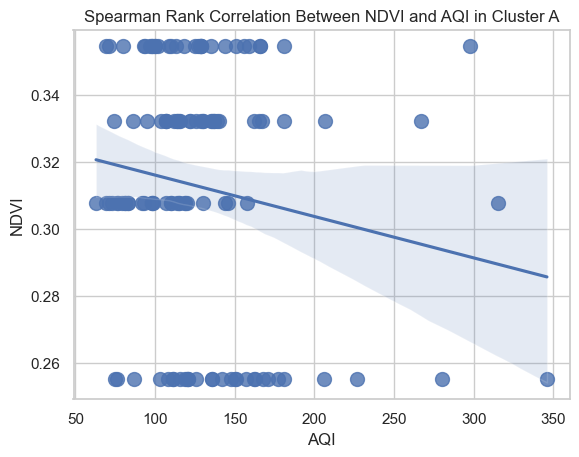

There is no statistically significant correlation.
Spearman correlation coefficient: -0.08435917816706703
P-value: 0.3596300814092094


In [18]:
x = dfall['AQI']
y = dfall['NDVI']
corr_coefficient, p_value = spearmanr(x, y)

sns.regplot(x=x, y=y, scatter_kws={'s': 100})
plt.xlabel('AQI')
plt.ylabel('NDVI')
plt.title('Spearman Rank Correlation Between NDVI and AQI in Cluster A')
plt.show()

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("There is no statistically significant correlation.")

print("Spearman correlation coefficient:", corr_coefficient)
print("P-value:", p_value)